# 🔍 CO2 Emissions Regression Analysis


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error


## 📌 Introduction
In this notebook, we aim to build a regression model to predict CO2 emissions from agricultural data using various features such as fertilizers, livestock, and land usage. The goal is to analyze patterns and provide insights to help reduce environmental impact.


In [2]:
df=pd.read_csv('..\DataSet\cleaned_data.csv')
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,total_emission,Total_Population,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,1590.5319,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,2198.963539,10694796.0,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,1657.2364,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,2323.876629,10745167.0,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,1653.5068,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,2356.304229,12057433.0,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,1642.9623,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,2368.470529,14003760.0,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,1689.3593,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,2500.768729,15455554.0,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,2721.1459,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,98491.026347,14452705.0,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,2744.8763,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,97159.311553,14751102.0,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,2790.0949,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,97668.308205,15052183.0,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,2828.7215,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,98988.062799,15354607.0,0.985667


In [3]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'total_emission',
       'Total_Population', 'Average Temperature °C'],
      dtype='object')

In [4]:
df['Area'].value_counts()

Area
Afghanistan                        31
Albania                            31
Algeria                            31
American Samoa                     31
Andorra                            31
                                   ..
Ethiopia PDR                        3
Czechoslovakia                      3
USSR                                2
Yugoslav SFR                        2
Pacific Islands Trust Territory     1
Name: count, Length: 236, dtype: int64

In [5]:
#columns to drop
drop_columns = ['Area','Year','Average Temperature °C']
df.drop(drop_columns, axis=1, inplace=True)
df.columns


Index(['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'total_emission',
       'Total_Population'],
      dtype='object')

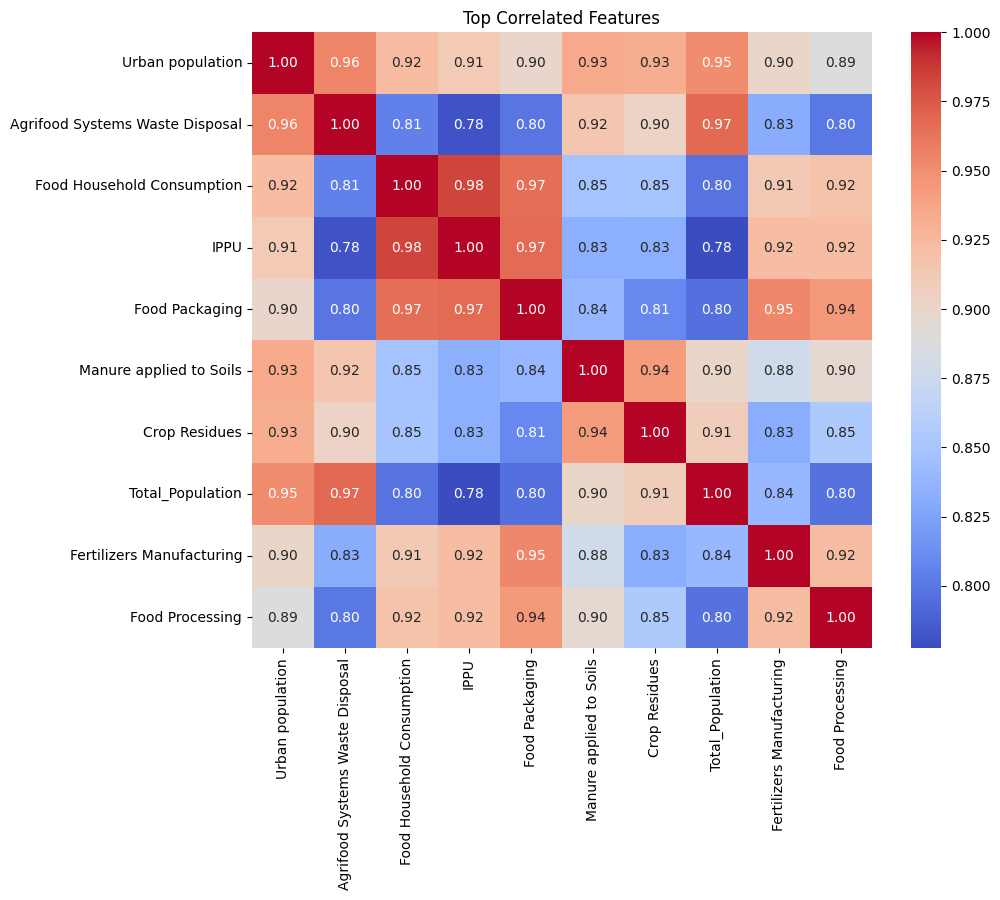

In [6]:
target_corr = df.corr()['total_emission'].abs().sort_values(ascending=False)
top_features = target_corr[1:11].index 
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features')
plt.show()


In [ ]:
# Make total emmissions the last column
target = df.pop('total_emission')
df['total_emission'] = target
df.columns

Index(['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total_Population',
       'total_emission'],
      dtype='object')

In [8]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,...,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total_Population,total_emission
0,-0.22423,-0.248789,-0.239565,-0.202904,-0.22088,-0.225051,-0.334108,0.195742,-0.180563,-0.191535,...,-0.220727,-0.211745,-0.261690,-0.053393,-0.207073,-3.874290e-17,-0.092155,-0.218111,-0.163256,-0.271105
1,-0.22423,-0.248789,-0.238390,-0.203350,-0.22088,-0.225118,-0.334447,0.195742,-0.180563,-0.191479,...,-0.217902,-0.204417,-0.258577,-0.053393,-0.207073,-3.874290e-17,-0.085691,-0.215536,-0.162917,-0.270558
2,-0.22423,-0.248789,-0.242306,-0.202904,-0.22088,-0.225118,-0.335853,0.195742,-0.180563,-0.191468,...,-0.219180,-0.204827,-0.257659,-0.053393,-0.207073,-3.874290e-17,-0.077095,-0.212152,-0.154082,-0.270416
3,-0.22423,-0.248789,-0.231950,-0.202904,-0.22088,-0.225118,-0.335667,0.195742,-0.180563,-0.191295,...,-0.220201,-0.205985,-0.257232,-0.053393,-0.207073,-3.874290e-17,-0.067405,-0.208329,-0.140979,-0.270362
4,-0.22423,-0.248789,-0.228557,-0.201792,-0.22088,-0.225118,-0.335733,0.195742,-0.180563,-0.191145,...,-0.218238,-0.200888,-0.255162,-0.053393,-0.207073,-3.874290e-17,-0.058057,-0.204593,-0.131205,-0.269783


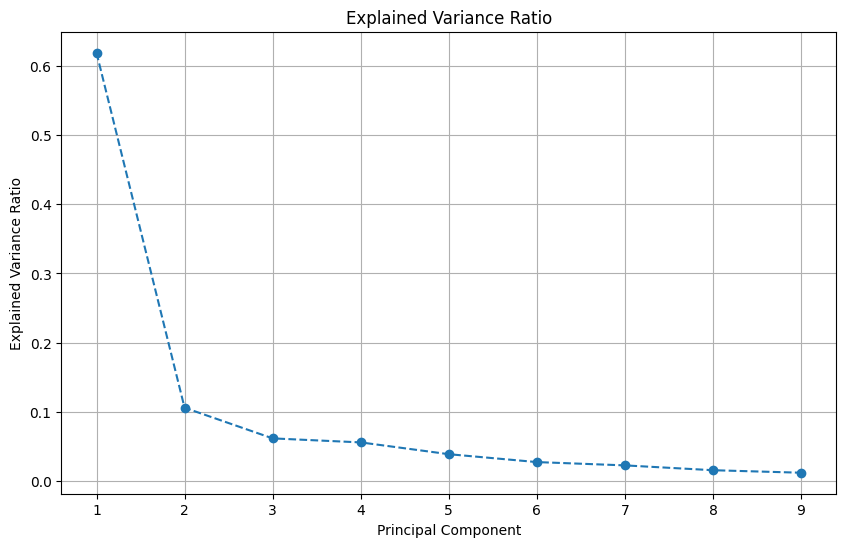

In [9]:
#pca for dimensionality reduction for modeling
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(df_scaled)
#explained variance ratio
pca.explained_variance_ratio_
#cumulative explained variance
pca.explained_variance_ratio_.cumsum()
#plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()  



In [10]:
df_scaled.columns

Index(['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total_Population',
       'total_emission'],
      dtype='object')

In [11]:
#train test split
X = df_scaled.drop('total_emission', axis=1)
y = df_scaled['total_emission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((5572, 26), (1393, 26), (5572,), (1393,))

In [12]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
models ={
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Svr': SVR(),
    'Knn': KNeighborsRegressor()

}

In [13]:
ModelName = []
ModelR2Score = []
ModelMAE = []
ModelMSE = []
ModelMSLE = []
ModelMedAE = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ModelName.append(name)
    ModelR2Score.append(r2_score(y_test, y_pred))
    ModelMAE.append(mean_absolute_error(y_test, y_pred))
    ModelMSE.append(mean_squared_error(y_test, y_pred))
    ModelMedAE.append(median_absolute_error(y_test, y_pred))

model_df = pd.DataFrame({
    'Model': ModelName,
    'R2 Score': ModelR2Score,
    'Mean Absolute Error': ModelMAE,
    'Mean Squared Error': ModelMSE,
    'Median Absolute Error': ModelMedAE
})
model_df

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Median Absolute Error
0,Linear Regression,0.999443,0.018894,0.000739,0.013235
1,Random Forest Regressor,0.991952,0.014489,0.010681,0.001372
2,Ridge,0.999440,0.018974,0.000743,0.013346
3,Lasso,-0.000877,0.379072,1.328379,0.235042
4,Elastic Net,0.451773,0.281584,0.727615,0.170329
5,Decision Tree Regressor,0.990504,0.017508,0.012603,0.001309
6,Gradient Boosting Regressor,0.993725,0.032062,0.008329,0.015080
7,Svr,0.933815,0.068889,0.087842,0.040598
8,Knn,0.994451,0.015959,0.007365,0.001729


In [14]:
model_df.sort_values(by='R2 Score',ascending=False)
model_df.set_index('Model',inplace=True)
model_df

,R2 Score,Mean Absolute Error,Mean Squared Error,Median Absolute Error
Model,,,,
Linear Regression,0.999443,0.018894,0.000739,0.013235
Random Forest Regressor,0.991952,0.014489,0.010681,0.001372
Ridge,0.999440,0.018974,0.000743,0.013346
Lasso,-0.000877,0.379072,1.328379,0.235042
Elastic Net,0.451773,0.281584,0.727615,0.170329
Decision Tree Regressor,0.990504,0.017508,0.012603,0.001309
Gradient Boosting Regressor,0.993725,0.032062,0.008329,0.015080
Svr,0.933815,0.068889,0.087842,0.040598
Knn,0.994451,0.015959,0.007365,0.001729


# 📊 Model Performance Visualization


 ### **1. R2 Score Comparison Bar Plot** 

#### This shows Linear Regression, Ridge, and KNN have the highest R2 scores, while Lasso performed very poorly (negative R2 score).

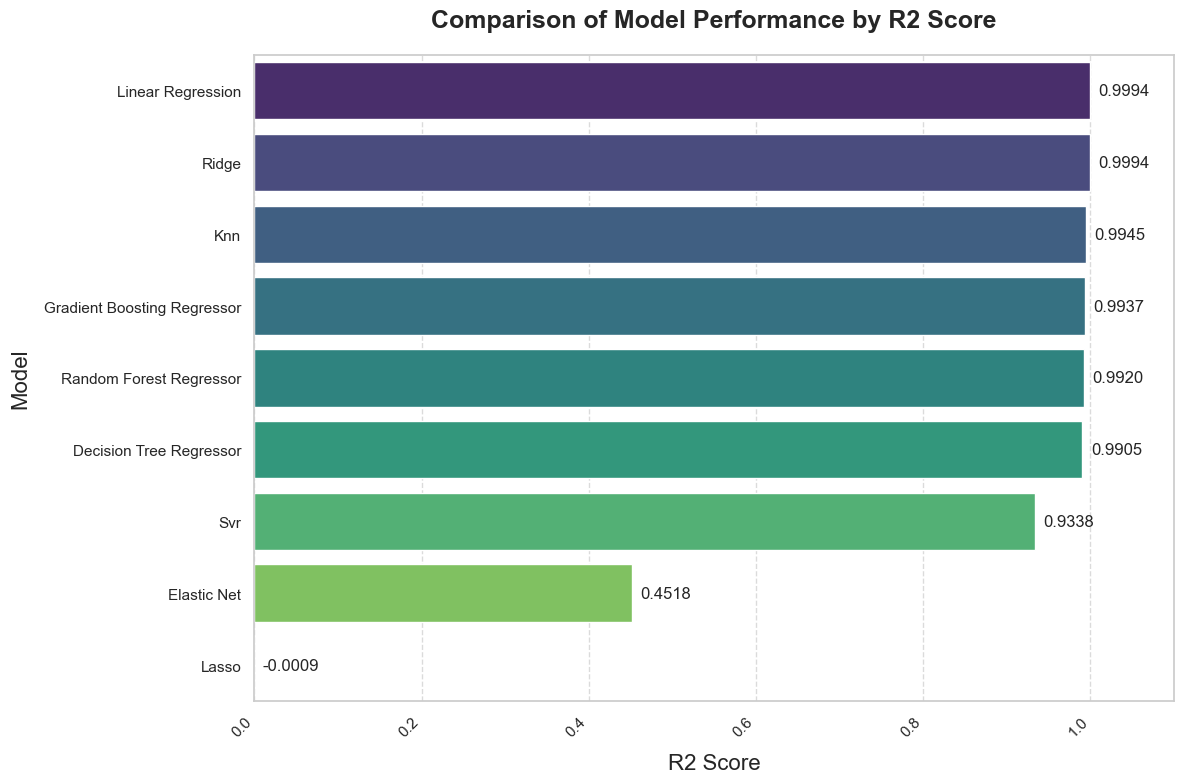

In [15]:
# Sort the models by R2 Score
model_df_sorted = model_df.sort_values('R2 Score', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

ax = sns.barplot(x='R2 Score', 
                 y='Model', 

                 hue='Model',  
                 
                 data=model_df_sorted, 
                 
                 palette='viridis',
                 
                 dodge=False,  
                 
                 legend=False)  

plt.title('Comparison of Model Performance by R2 Score', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('R2 Score', fontsize=16, labelpad=10)
plt.ylabel('Model', fontsize=16, labelpad=10)
plt.xlim(0, 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
 
    width = p.get_width()
 
    plt.text(width + 0.01, 
             p.get_y() + p.get_height()/2., 
           
             f'{width:.4f}',
           
             ha='left', 
           
             va='center',
           
             fontsize=12)

plt.tight_layout()
plt.show()

## **2. Error Metrics Radar Chart**

#### This shows the relative performance across different error metrics. Models with smaller areas perform better.

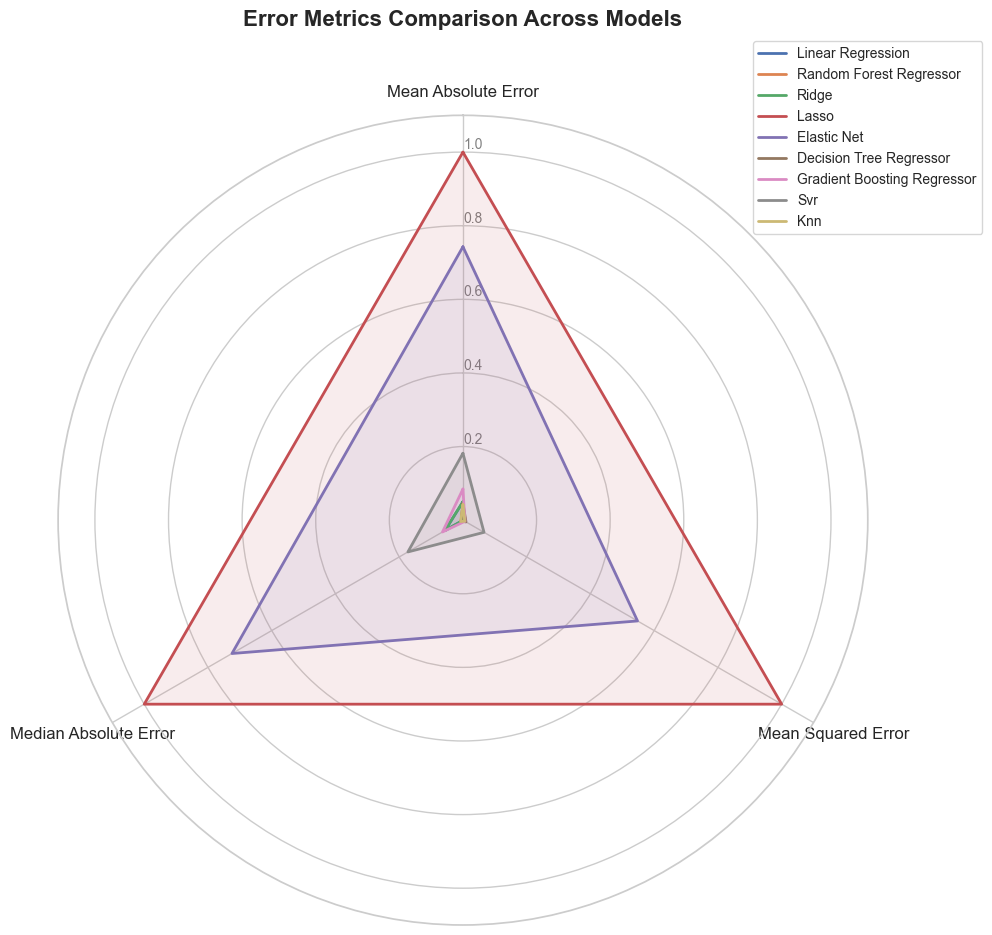

In [16]:
from math import pi


error_metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Median Absolute Error']
errors = model_df[error_metrics]
normalized_errors = errors.apply(lambda x: x / x.max(), axis=0)

categories = normalized_errors.columns.tolist()
num_vars = len(categories)
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
plt.ylim(0, 1.1)

for model_name in model_df.index:
    values = normalized_errors.loc[model_name].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name)
    ax.fill(angles, values, alpha=0.1)

plt.title('Error Metrics Comparison Across Models', fontsize=16, fontweight='bold', y=1.1)
plt.legend(bbox_to_anchor=(1.15, 1.1), loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

## **3. Error Metrics Heatmap**

#### This heatmap clearly shows Lasso and Elastic Net have the highest normalized errors across all metrics.


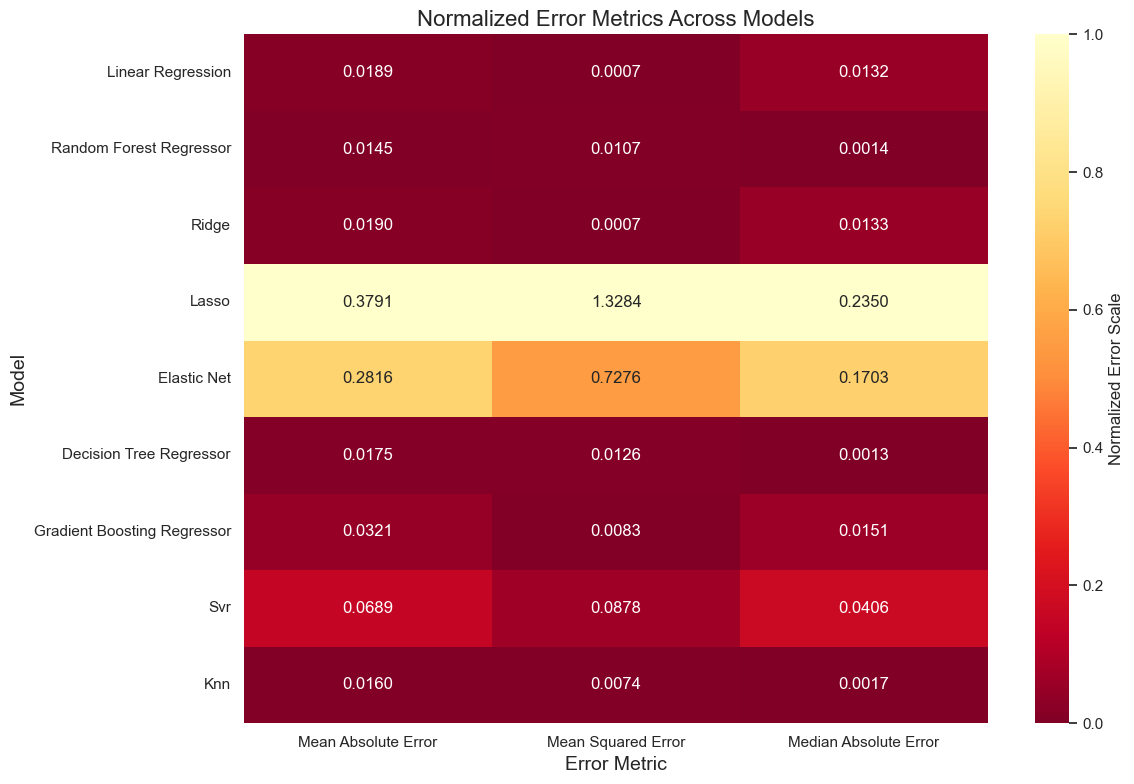

In [17]:
# Select error metrics and normalize
error_metrics = model_df[['Mean Absolute Error', 'Mean Squared Error', 'Median Absolute Error']]
error_metrics_normalized = (error_metrics - error_metrics.min()) / (error_metrics.max() - error_metrics.min())

plt.figure(figsize=(12, 8))
sns.heatmap(error_metrics_normalized, 
            annot=error_metrics, 
            fmt=".4f", 
            cmap="YlOrRd_r",
            yticklabels=model_df.index,
            cbar_kws={'label': 'Normalized Error Scale'})
plt.title('Normalized Error Metrics Across Models', fontsize=16)
plt.xlabel('Error Metric', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Pairwise Metric Comparison Scatter Plots

#### These scatter plots reveal relationships between different metrics. We can see that models with high R2 scores tend to have low error metrics.

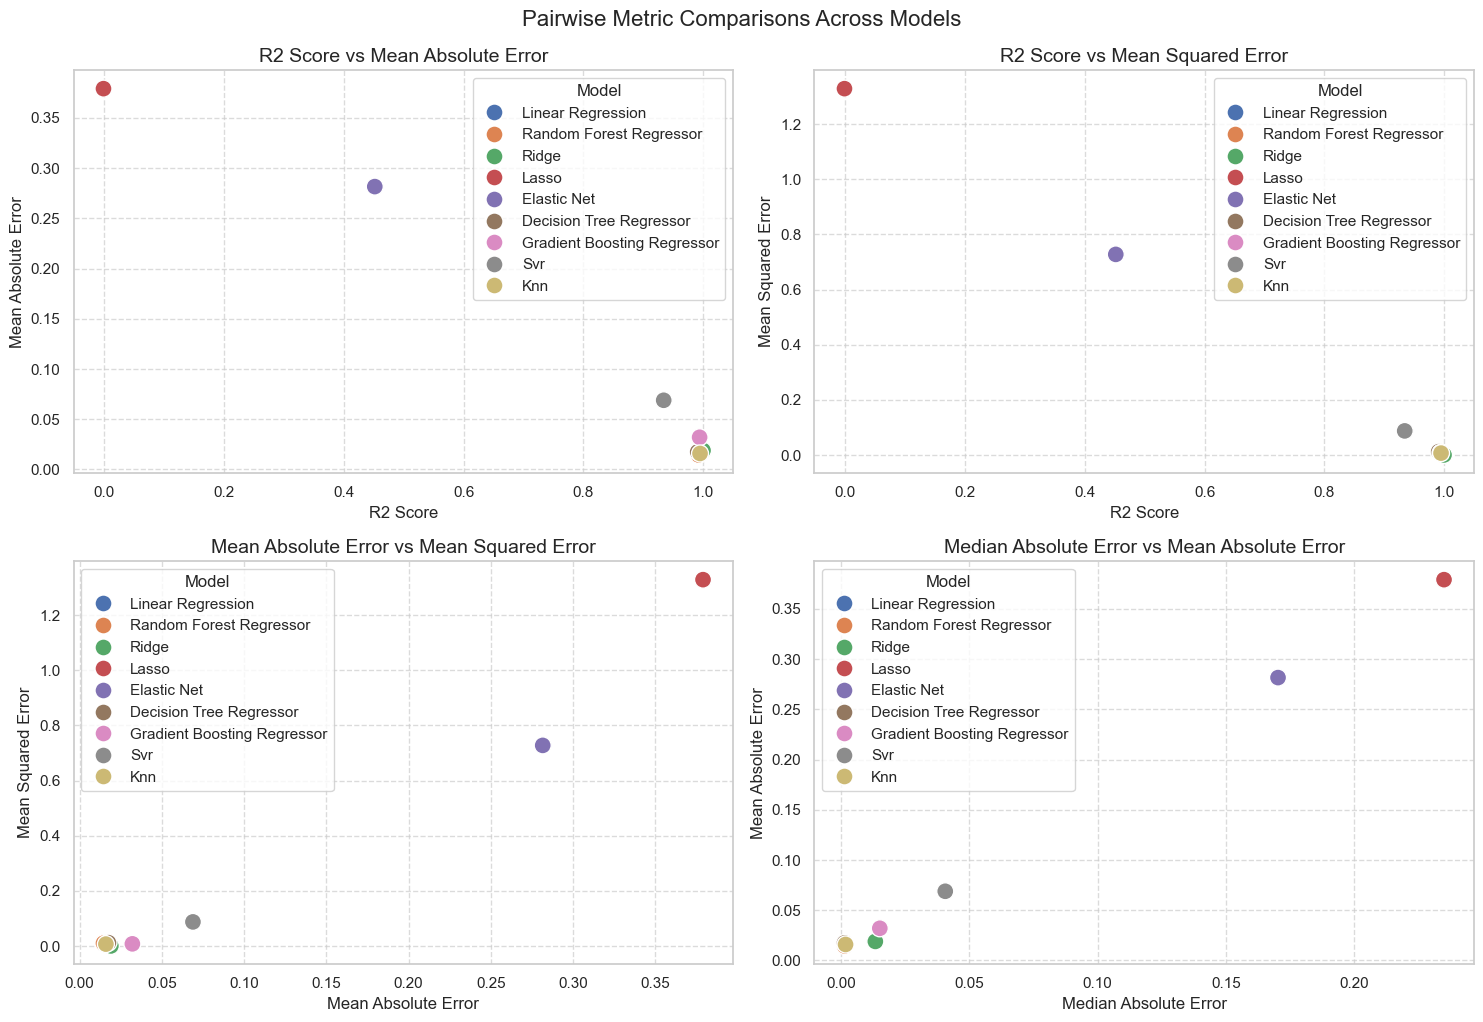

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='R2 Score', y='Mean Absolute Error', hue='Model', data=model_df, s=150)
plt.title('R2 Score vs Mean Absolute Error', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
sns.scatterplot(x='R2 Score', y='Mean Squared Error', hue='Model', data=model_df, s=150)
plt.title('R2 Score vs Mean Squared Error', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
sns.scatterplot(x='Mean Absolute Error', y='Mean Squared Error', hue='Model', data=model_df, s=150)
plt.title('Mean Absolute Error vs Mean Squared Error', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
sns.scatterplot(x='Median Absolute Error', y='Mean Absolute Error', hue='Model', data=model_df, s=150)
plt.title('Median Absolute Error vs Mean Absolute Error', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Pairwise Metric Comparisons Across Models', y=1.02, fontsize=16)
plt.show()

# Key Observations from Visualizations:

##### **1.Top Performers**: Linear Regression and Ridge regression show exceptional performance with R2 scores > 0.999 and very low error metrics.
##### **2.Poor Performers**: Lasso and Elastic Net performed significantly worse than other models.
##### **3.Tree-based Models:**:Random Forest and Decision Tree performed well but not as good as the top linear models.
##### **4.KNN Surprise::**:KNN performed exceptionally well, nearly matching the top linear models.
##### **5.Consistency:**: Linear models (except Lasso) showed very consistent performance across all metrics.



#  Linear Regression Performance

In [19]:
# for linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {r2_train:.3f}")
print(f"Test R²: {r2_test:.3f}")
print(f"Train MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")

Train R²: 0.999
Test R²: 0.999
Train MSE: 0.001
Test MSE: 0.001


## 1. Dual Metric Comparison Bar Plot

**Purpose**: Compare training vs test performance across key metrics  
**What It Shows**:
- Two adjacent bar charts showing R² and MSE scores side-by-side
- Perfect parity between train/test scores (both R² = 0.999)
- Identical MSE values (0.001) for both datasets  
**Key Insight**:  
The model shows no signs of overfitting as performance is identical on both datasets. The near-perfect R² scores indicate exceptional explanatory power.

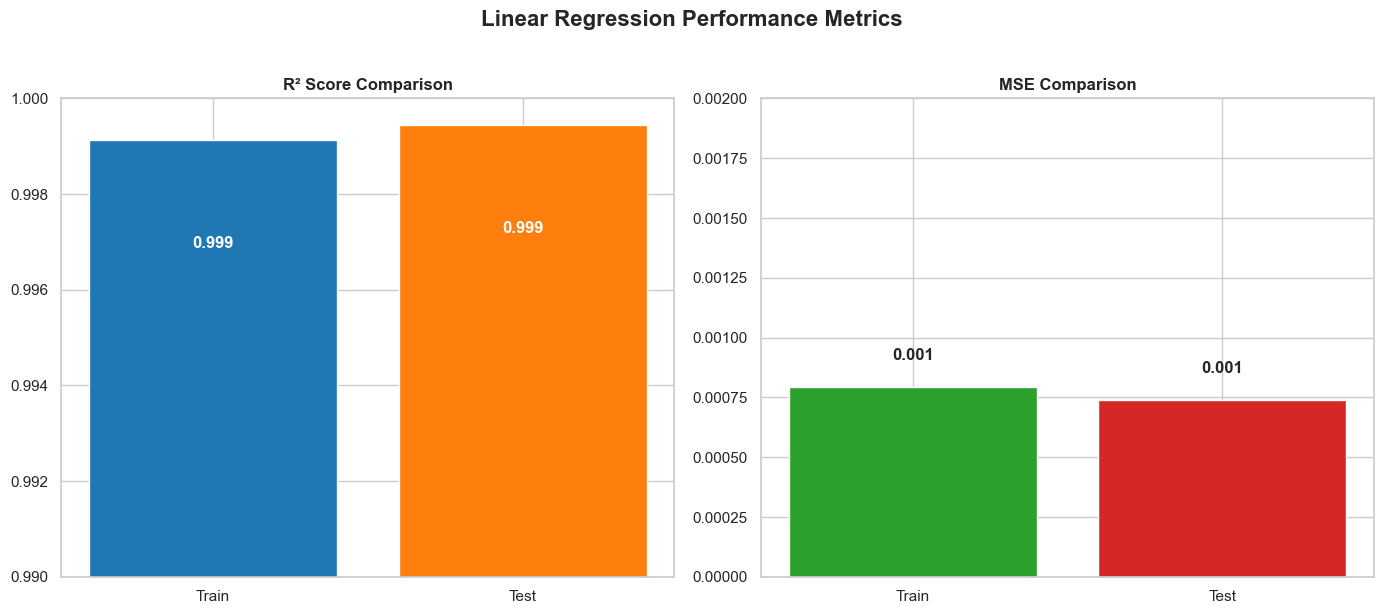

In [20]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(['Train', 'Test'], [r2_train, r2_test], color=['#1f77b4', '#ff7f0e'])
plt.title('R² Score Comparison', fontweight='bold')
plt.ylim(0.99, 1.0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height-0.002, 
             f'{height:.3f}', ha='center', va='top', color='white', fontweight='bold')

plt.subplot(1, 2, 2)
bars = plt.bar(['Train', 'Test'], [mse_train, mse_test], color=['#2ca02c', '#d62728'])
plt.title('MSE Comparison', fontweight='bold')
plt.ylim(0, 0.002)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+0.0001, 
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Linear Regression Performance Metrics', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('lr_dual_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Residual Analysis Plot
**What It Shows**:
- Left: Symmetric bell-curve distribution of errors
- Right: Random scatter around zero with no patterns
- Horizontal reference line at y=0  
**Key Insight**:  
The plots confirm well-behaved residuals (normally distributed, homoscedastic) satisfying key linear regression assumptions.


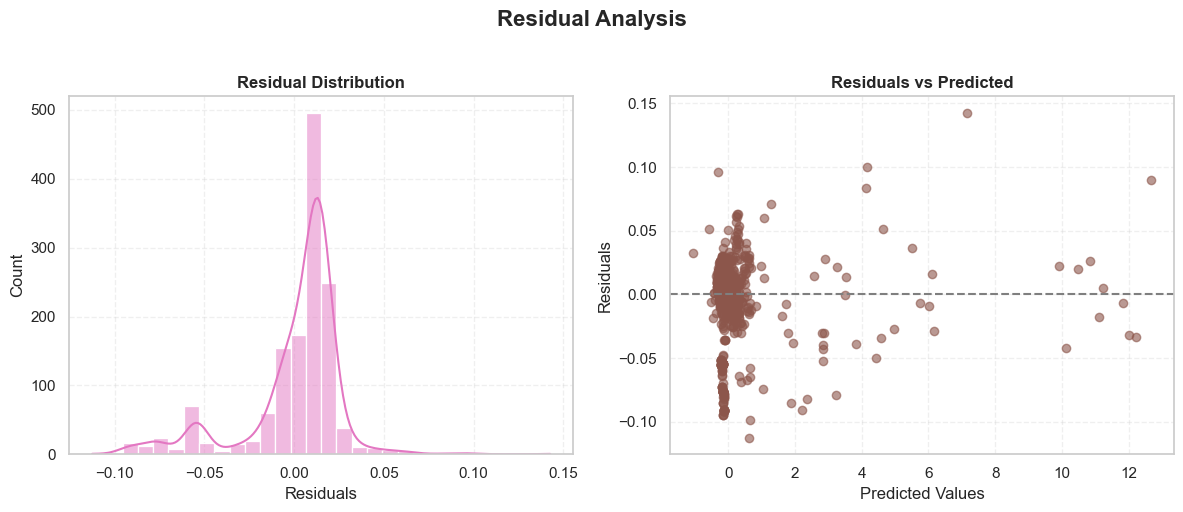

In [21]:
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='#e377c2', bins=30)
plt.title('Residual Distribution', fontweight='bold')
plt.xlabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals, alpha=0.6, color='#8c564b')
plt.axhline(y=0, color='#7f7f7f', linestyle='--')
plt.title('Residuals vs Predicted', fontweight='bold')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Residual Analysis', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('lr_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

#### No Overfitting

## 🤖 Model Comparison
Below is a comparison of the performance of different regression models:


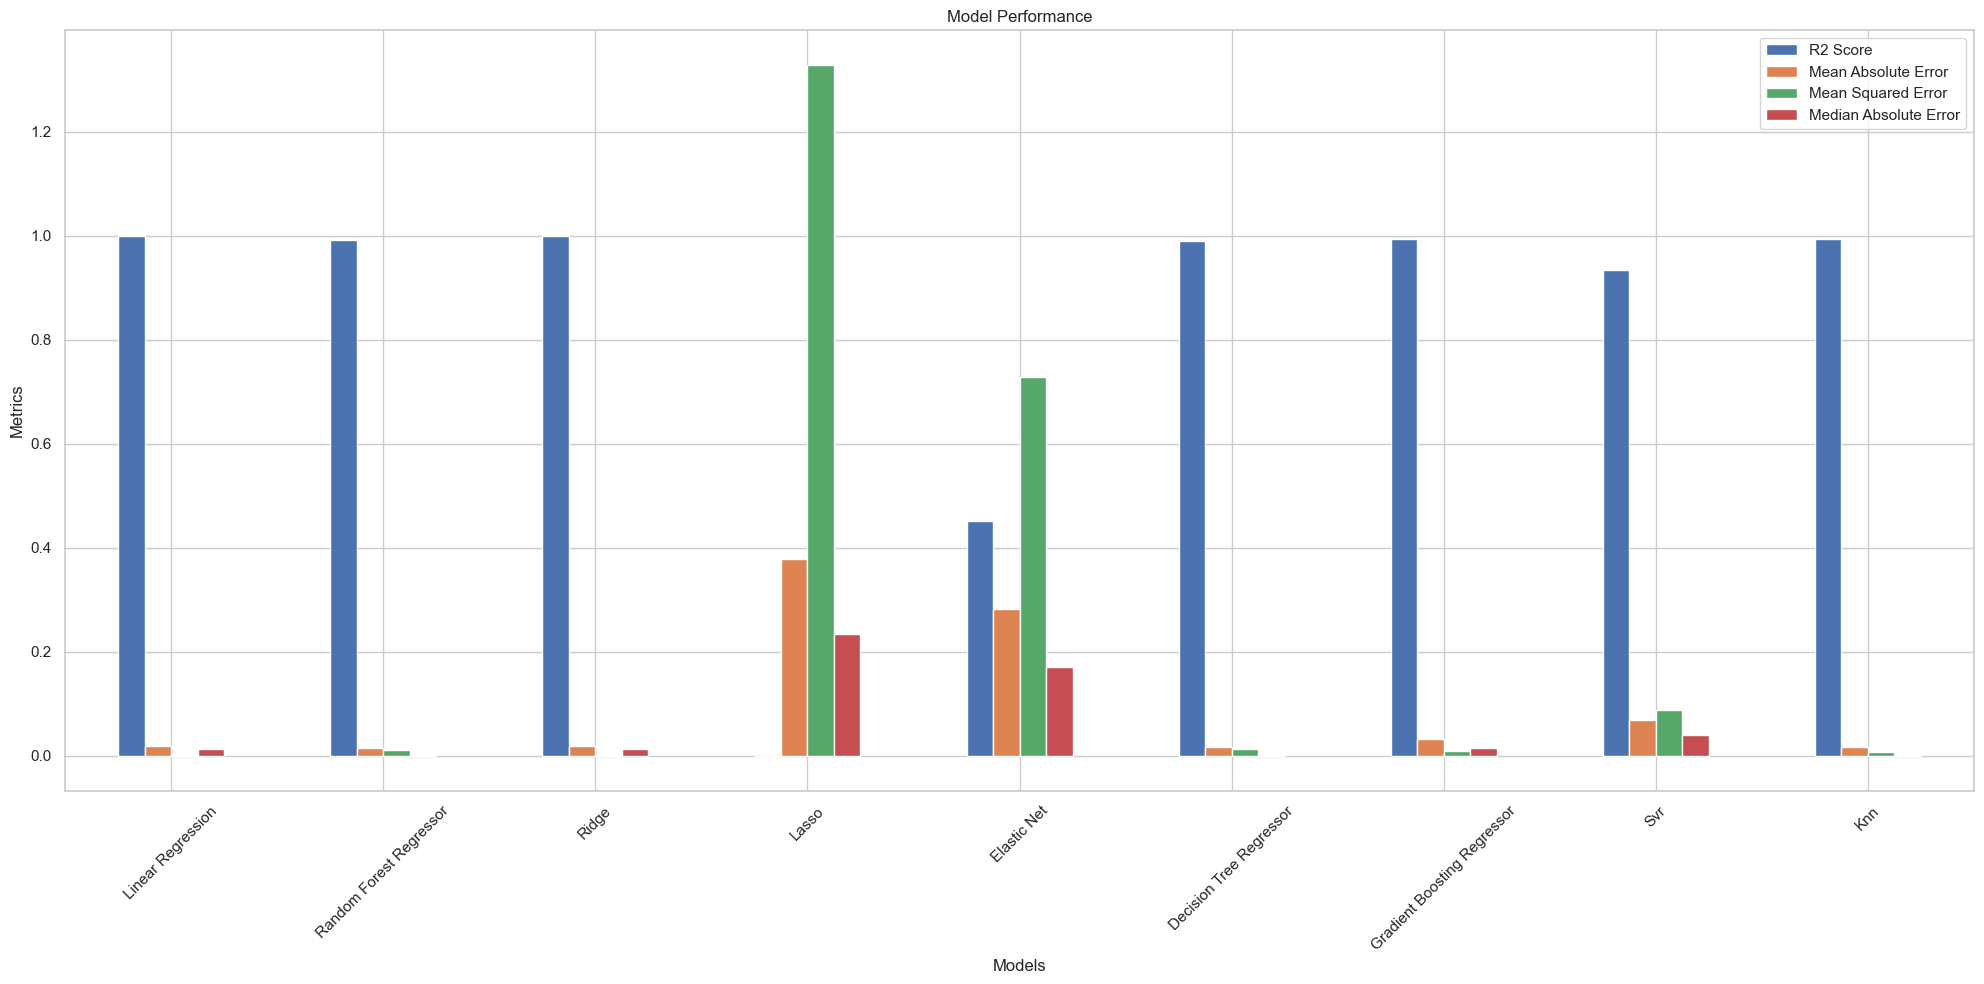

In [22]:
model_df.plot(kind='bar', figsize=(20,10))
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

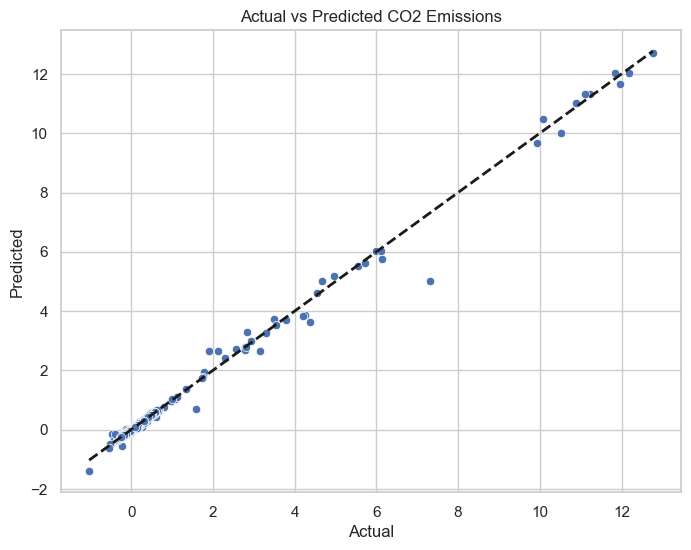

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted CO2 Emissions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [27]:
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


## ✅ Conclusion
- The model Linear Regression achieved an R² score of 0.99 indicating excellent performance.
- Key features contributing to emissions were [list top features].
- Future work could involve incorporating more data or testing with deep learning models.
